In [305]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Polygon
from matplotlib import colormaps
from matplotlib import text
import math

In [329]:
def calcula_flecha_qualquer(direcao:bool,
                            x:float,
                            y:float,
                            largura:float,
                            altura:float,
                            perc_largura_seg_menor:float,
                            perc_largura_seg_maior:float,
                            perc_altura:float):


    if direcao:
      multiplicador=1
    else:
      multiplicador=-1


    altura_base=altura*perc_altura
    altura_aba= (altura - altura_base)/2


    altura_ab=altura_base + altura_aba
    altura_ab2=altura_aba +(altura_base/2)


    largura_interna=largura * perc_largura_seg_menor
    largura_externa=largura * perc_largura_seg_maior
    largura_ei=largura_externa-largura_interna


    #ponto 01
    px= x
    py= y  + altura_ab
    p1=[ px , py ]


    #ponto 02
    px= x + (multiplicador * (largura_externa))
    p2=[px, py]


    #ponto 03
    px=x + (multiplicador * largura_interna)
    py= y + altura
    p3=[px, py]


    #ponto 05 (mais fácil calcular antes do 04)
    px=x + (multiplicador * largura)
    py= y + altura_aba + (altura_base/2)
    p5=[px, py]


    #ponto04 (encontrado por semelhança de triangulos)
    py=y+altura
    div01= (altura_aba) / (altura_ab2)
    num01=(largura_externa-largura_interna)
    desconto=(num01)/ (div01)


    px= x   + (largura - desconto) * multiplicador
    p4=[px, py]


    #ponto 06
    p6=[p4[0], y]


    #ponto 07
    p7=[p3[0], y]


    #ponto 08
    py=y+altura_aba
    p8=[p2[0], py]


    #ponto 09
    p9=[x , py]

    coord=[p1, p2 , p3, p4 ,  p5, p6, p7, p8 , p9]


    medidas={}
    medidas['teto']=max([x[1] for x in coord ])
    medidas['chao']=min([x[1] for x in coord ])
    medidas['ponta_esquerda'] = min([x[0] for x in coord ])
    medidas['ponta_direita'] = max([x[0] for x in coord ])
    medidas['largura_cabeca'] = abs(p5[0] -p3[0])
    medidas['largura_cauda'] = abs(p3[0] -p1[0])
    medidas['aba'] = altura_aba
    medidas['base'] = altura_base
    medidas['largura_exterior'] = largura_externa
    medidas['largura_ei'] =largura_ei


    return[coord, medidas ]

In [330]:
def calcula_flecha_proporcional(dir:bool, x:float, y:float, largura:float):
  #225 largura
  #143 altura

  #haste 47
  altura=largura*(143/225)
  pa=47/143

  #interno 136
  s2= (136/225)


  #externo 94
  s1 = (94/225)


  return calcula_flecha_qualquer(dir, x, y, largura, altura ,s1 ,s2, pa)


In [451]:
def cria_poligono_proporcional(dir:bool, x:float, y:float, largura:float,
                               cores:str='Blues', menor:bool=False, texto:str=None):

  coord, medidas = calcula_flecha_proporcional(dir, x , y , largura)



  cmap = colormaps.get_cmap(cores)

  if menor:
    base=0.15
  else:
    base=0.65


  ce=cmap(base+0.35)
  ci=cmap(base)

  cores=[ce,ci]

  return [Polygon(coord, facecolor = ci, linewidth=1.4, edgecolor=ce),
          coord,
          medidas,
          cores]



In [462]:

def gerar_flechas_compararativas(e:int, d:int, cores="Blues"):

  if e>d:
    maior=e
    menor=d
  else:
    maior=d
    menor=e


  largura_ref = 1000.0
  separador = 5.0

  largura_menor = (menor * largura_ref) / maior

  c_maior, m_maior = calcula_flecha_proporcional(True, 0, 0, largura_ref)
  c_menor, m_menor = calcula_flecha_proporcional(True, 0, 0, largura_menor)

  separacao = ( separador )






  if e>d:
    te=m_maior
    td=m_menor
    pem=False
    le=largura_ref
    ld=largura_menor

  else:
    td=m_maior
    te=m_menor
    ld=largura_ref
    le=largura_menor
    pem=True






  phe=  -2*separacao + te['largura_exterior']

  if  te[ 'largura_ei']>td['largura_cauda']:
    phd= te['largura_ei'] -td['largura_cauda']
  else:
     phd = -td['largura_cauda'] +2*separacao


  pve=separacao
  pvd =  -td['base'] -td['aba'] -separacao - (td['aba'] - te['aba'] if td['aba']>te['aba'] else 0)

  pe=cria_poligono_proporcional(False,  phe, pve, le, menor=pem,  cores=cores)
  pd=cria_poligono_proporcional(True, phd , pvd, ld, menor=not(pem), cores=cores)


  return [pe, pd]


In [463]:
def anotar_poligono(texto, dir,  coord, cores, ax):

  l0=coord[0][0]
  l1=coord[4][0]



  if dir:
    l=l1-l0
    tx= l0 + abs((l)/2)
  else:
    l=l0-l1
    tx=l1  + abs( (l0-l1) /2 )




  h1=coord[7][1]
  h2=coord[0][1]
  h=h2-h1
  ty=h1 +((h)/2)

  fs =(l/1000) * 38

  ci, ce = cores

  t=ax.text(tx,
            ty,
            texto,
            ha='center',
            va='center',
            fontfamily='monospace',
            fontsize=fs,
            color=ci)




In [464]:
def arruma_eixos(em, dm , ax):
  x1 = min(em['ponta_esquerda'], dm['ponta_esquerda']) - 10
  x2 = max(em['ponta_direita'], dm['ponta_direita']) + 10
  ax.set_xlim([x1,x2])

  y1 = min(em['chao'], dm['chao'])
  y2 = max(em['teto'], dm['teto'])
  ax.set_ylim([y1 -10, y2 +10])


In [471]:
def grafico_comparativo(e, d, et="Incorretos " , dt="Corretos",
                        h=6, b=6, cores="Blues"):



  fig,ax = plt.subplots()
  fig.set_size_inches(h, b)

  pe , pd = gerar_flechas_compararativas(e, d, cores)


  ep, ec, em, epa = pe
  dp, dc, dm, dpa = pd



  ax.add_patch(ep)
  anotar_poligono(et + str(e), False, ec, epa, ax)

  ax.add_patch(dp)
  anotar_poligono(dt + str(d), True, dc, dpa, ax)



  arruma_eixos(em, dm, ax)






  #plt.grid()
  plt.axis('off')
  plt.show()

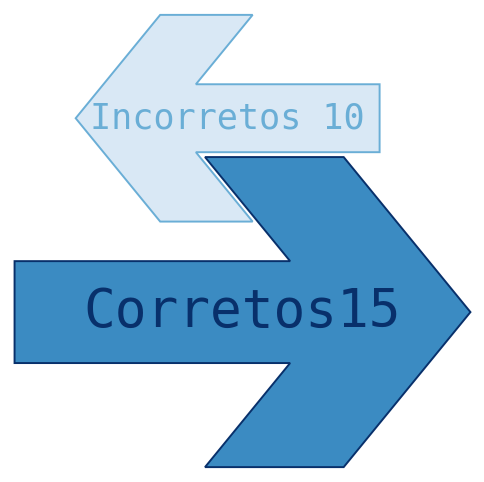

In [472]:
grafico_comparativo(10, 15)

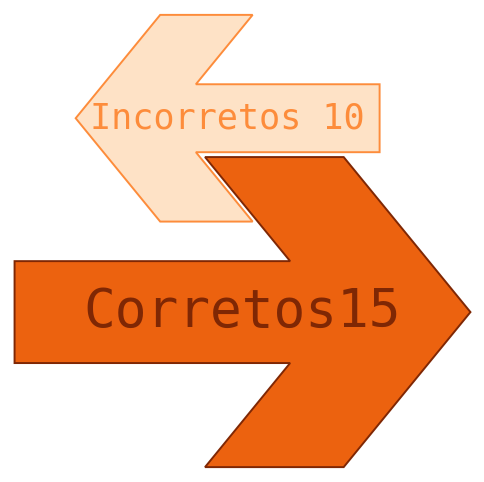

In [473]:
grafico_comparativo(10, 15, cores="Oranges")

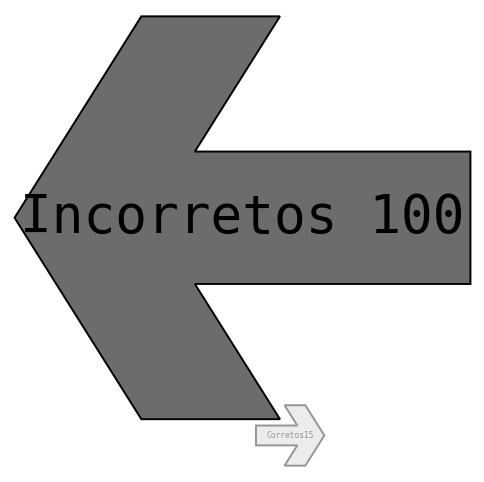

In [474]:
grafico_comparativo(100, 15, cores="Greys")

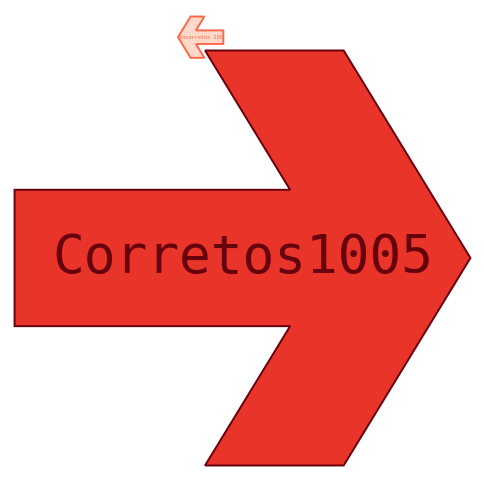

In [475]:
grafico_comparativo(100, 1005, cores="Reds")